> Projeto Desenvolve <br>
Programação Intermediária com Python <br>
Profa. Camila Laranjeira (mila@projetodesenvolve.com.br) <br>

# 3.9 - Visualização de Dados

## Exercícios
Vamos trabalhar com as mesmas bases de dados do exercício de Pandas. Aqui estão os links caso você queira baixar novamente, mas recomendo trabalhar com o `wc_formatado.csv` que exportamos na questão Q2 do exercício anterior.

* https://raw.githubusercontent.com/camilalaranjeira/python-intermediario/main/fifa-wc/matches_1930_2022.csv
* https://raw.githubusercontent.com/camilalaranjeira/python-intermediario/main/fifa-wc/matches_1991_2023.csv

Para relembrar, essas são as colunas do dataframe:
```
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   time_1             1312 non-null   string        
 1   time_2             1312 non-null   string        
 2   gols_1             1312 non-null   int64         
 3   gols_2             1312 non-null   int64         
 4   data               1312 non-null   datetime64[ns]
 5   ano                1312 non-null   int64         
 6   país_sede          1312 non-null   string        
 7   comparecimento     1312 non-null   int64         
 8   resultado          1312 non-null   string        
 9   rodada             1312 non-null   category      
 10  gols_1_detalhes    970 non-null    string        
 11  gols_2_detalhes    771 non-null    string        
 12  gols_1_contra      57 non-null     string        
 13  gols_2_contra      30 non-null     string        
 14  gols_1_penalti     170 non-null    string        
 15  gols_2_penalti     119 non-null    string        
 16  cartao_vermelho_1  59 non-null     string        
 17  cartao_vermelho_2  65 non-null     string        
 18  cartao_amarelo_1   834 non-null    string        
 19  cartao_amarelo_2   857 non-null    string        
 20  copa               1312 non-null   string 
```

#### Q1.
Realize todos os imports necessários para executar as três bibliotecas de visualização que conhecemos:
* Matplotlib (lembre-se do comando mágico)
* Seaborn
* Plotly

Para cada uma delas, altere o tema padrão de visualização. 

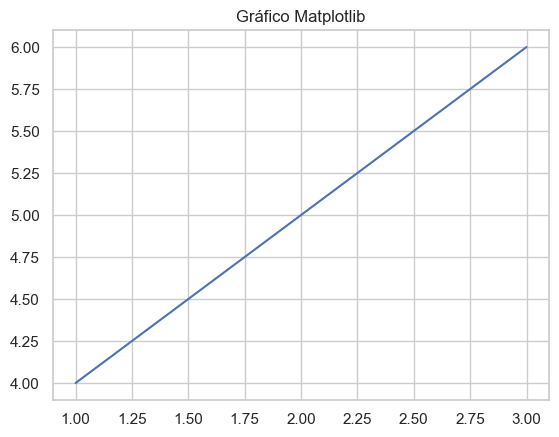

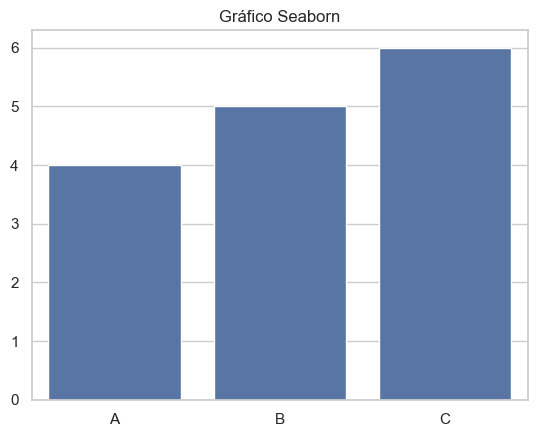

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.io as pio
import plotly.express as px

# matplotlib
plt.style.use('ggplot')  

# seaborn
sns.set_theme(style="whitegrid") 

# plotly
pio.templates.default = "plotly_white"  
plt.plot([1, 2, 3], [4, 5, 6])
plt.title("Gráfico Matplotlib")
plt.show()

sns.barplot(x=['A', 'B', 'C'], y=[4, 5, 6])
plt.title("Gráfico Seaborn")
plt.show()
fig = px.bar(x=['A', 'B', 'C'], y=[4, 5, 6], title="Gráfico Plotly")
fig.show()


#### Q2.
Sobre os dados de copa do mundo, qual a distribuição de público presente nos jogos? Isso pode ser respondido com um histograma com os dados da coluna `comparecimento`.  

Lembre-se que alguns jogos estavam com público 0 incorretamente, que tal remover essas ocorrências para não atrapalhar sua visualzação?

Você deve implementar essa visualização nas três bibliotecas que vimos:
* Matplotlib
* Seaborn
* Plotly

Garanta que o gráfico tenha pelo menos os atributos de título e rótulos de dimensão.

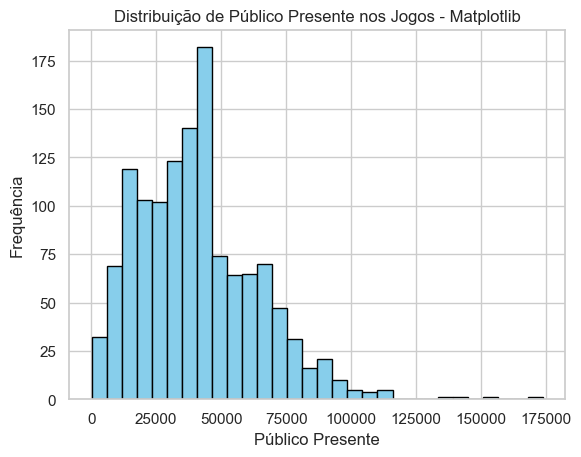

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# carregar os dados
wcwomen_df = pd.read_csv('matches_1991_2023.csv')
wcmen_df = pd.read_csv('matches_1930_2022.csv')

# Concatenar
wc = pd.concat((wcwomen_df, wcmen_df)).reset_index(drop=True)
wc = wc[wc['Attendance'] > 0]
wc.rename(columns={'Attendance': 'comparecimento'}, inplace=True)
wc = wc[wc['comparecimento'] > 0]
plt.hist(wc['comparecimento'], bins=30, color='skyblue', edgecolor='black')
plt.title("Distribuição de Público Presente nos Jogos - Matplotlib")
plt.xlabel("Público Presente")
plt.ylabel("Frequência")
plt.grid(True)
plt.show()


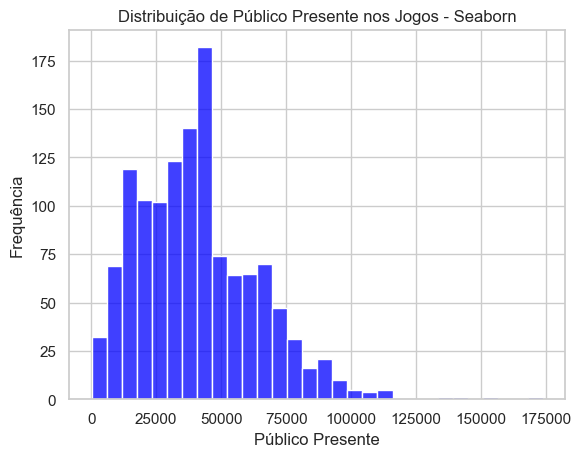

In [18]:
#### solução com seaborn
import seaborn as sns
import matplotlib.pyplot as plt
sns.histplot(wc['comparecimento'], bins=30, kde=False, color='blue')
plt.title("Distribuição de Público Presente nos Jogos - Seaborn")
plt.xlabel("Público Presente")
plt.ylabel("Frequência")
plt.show()


In [19]:
#### solução com plotly
import plotly.express as px
fig = px.histogram(wc, x='comparecimento', nbins=30, title="Distribuição de Público Presente nos Jogos - Plotly")
fig.update_layout(
    xaxis_title="Público Presente",
    yaxis_title="Frequência",
    template="plotly_white"
)
fig.show()


#### Q3.

Apresente um gráfico de dispersão (scatter) dos atributos `gols_1` e `gols_2`. Isso representa a relação entre gols feitos e gols tomados por jogo. Há alguma relação interessante entre esses atributos?

Para facilitar a visualização dos dados (já que tem muitos placares repetidos), aplique uma leve distorção aos dados para que cada ponto esteja deslocado aleatoriamente de seu valor original. Código apresentado a seguir
```python
gols = wc[['gols_1', 'gols_2']] * np.random.random((len(wc),2))
```

Você deve implementar essa visualização nas três bibliotecas que vimos:
* Matplotlib
* Seaborn
* Plotly

Garanta que o gráfico tenha pelo menos os atributos de título e rótulos de dimensão.

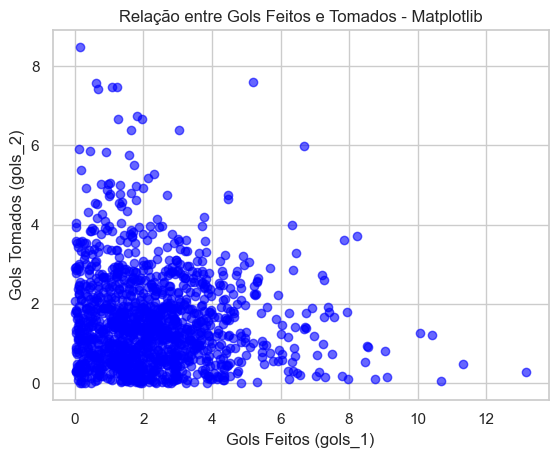

In [20]:
wc.rename(columns={'home_score': 'gols_1', 'away_score': 'gols_2'}, inplace=True)
import numpy as np

gols = wc[['gols_1', 'gols_2']] + np.random.random((len(wc), 2))

import matplotlib.pyplot as plt
import numpy as np

gols = wc[['gols_1', 'gols_2']] + np.random.random((len(wc), 2))

plt.scatter(gols['gols_1'], gols['gols_2'], alpha=0.6, color='blue')
plt.title("Relação entre Gols Feitos e Tomados - Matplotlib")
plt.xlabel("Gols Feitos (gols_1)")
plt.ylabel("Gols Tomados (gols_2)")
plt.grid(True)
plt.show()


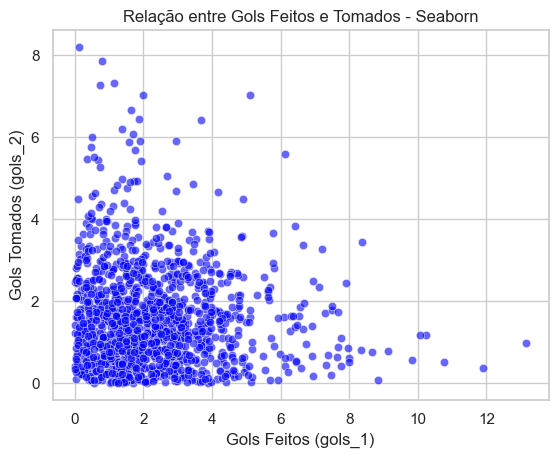

In [21]:
#### solução com seaborn
import seaborn as sns
import matplotlib.pyplot as plt

gols = wc[['gols_1', 'gols_2']] + np.random.random((len(wc), 2))
sns.scatterplot(x=gols['gols_1'], y=gols['gols_2'], alpha=0.6, color='blue')
plt.title("Relação entre Gols Feitos e Tomados - Seaborn")
plt.xlabel("Gols Feitos (gols_1)")
plt.ylabel("Gols Tomados (gols_2)")
plt.show()


In [22]:
#### solução com plotly
import plotly.express as px


gols = wc[['gols_1', 'gols_2']] + np.random.random((len(wc), 2))
fig = px.scatter(gols, x='gols_1', y='gols_2',
                 title="Relação entre Gols Feitos e Tomados - Plotly",
                 labels={'gols_1': 'Gols Feitos (gols_1)', 'gols_2': 'Gols Tomados (gols_2)'},
                 opacity=0.6)
fig.show()


#### Q4.

Apresente um gráfico de barras com o top 10 países que mais participaram de copas do mundo, onde no eixo x devem estar o nome dos países e no eixo y a contagem de participações. Você deve separar a contagem de participações em copas femininas e masculinas, empilhando as barras de cada informação.

No exemplo de barras empilhadas da galeria do matplotlib, imagine que a parte azul são as participações do país em copas masculinas, e em laranja as participações femininas:
* https://matplotlib.org/stable/gallery/lines_bars_and_markers/bar_stacked.html

Você deve implementar essa visualização nas três bibliotecas que vimos:
* Matplotlib
* Seaborn
* Plotly

Garanta que o gráfico tenha pelo menos os atributos:
* título
* rótulos de dimensão.
* legenda

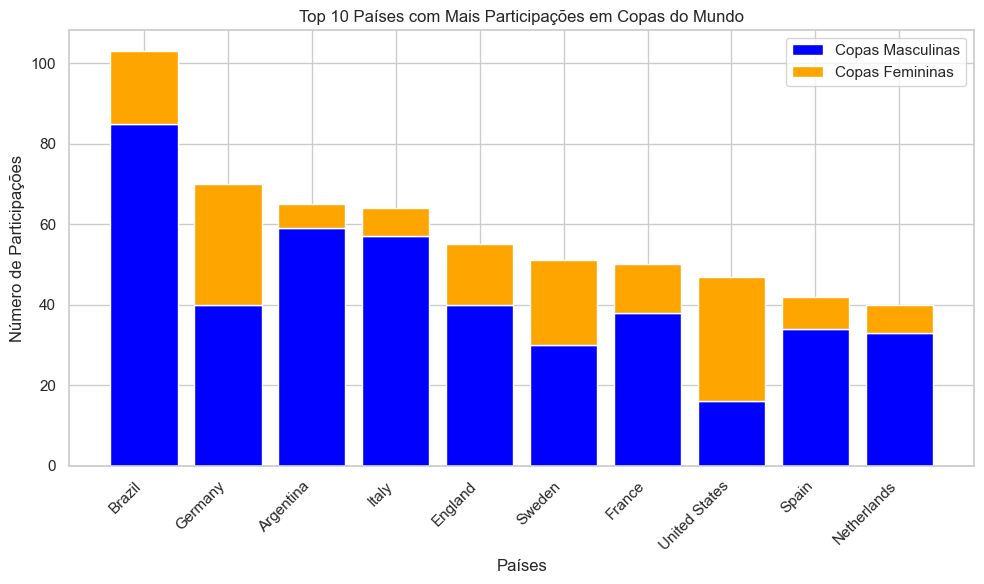

In [39]:
wc['copa'] = wc['Year'].apply(lambda x: 'Masculina' if x % 2 == 0 else 'Feminina')
participacoes = wc.groupby(['home_team', 'copa']).size().unstack(fill_value=0)
participacoes['total'] = participacoes.sum(axis=1)
top10 = participacoes.sort_values(by='total', ascending=False).head(10)
masculinas = top10['Masculina']
femininas = top10['Feminina']
paises = top10.index

import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(paises, masculinas, label='Copas Masculinas', color='blue')
ax.bar(paises, femininas, bottom=masculinas, label='Copas Femininas', color='orange')

# Configurações do gráfico
ax.set_title("Top 10 Países com Mais Participações em Copas do Mundo")
ax.set_xlabel("Países")
ax.set_ylabel("Número de Participações")
ax.legend()
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


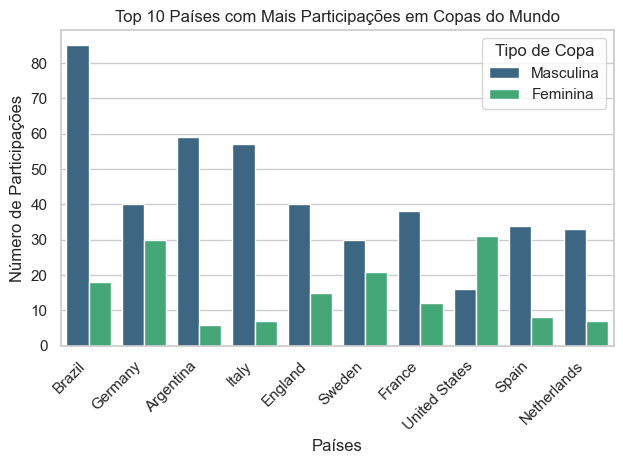

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

# seaborn
top10 = participacoes.sort_values(by='total', ascending=False).head(10).reset_index()
top10_melted = top10.melt(id_vars='home_team', value_vars=['Masculina', 'Feminina'],
                          var_name='Tipo de Copa', value_name='Participações')


sns.barplot(data=top10_melted, x='home_team', y='Participações', hue='Tipo de Copa', palette='viridis')

plt.title("Top 10 Países com Mais Participações em Copas do Mundo")
plt.xlabel("Países")
plt.ylabel("Número de Participações")
plt.xticks(rotation=45, ha='right')
plt.legend(title="Tipo de Copa")
plt.tight_layout()
plt.show()


In [44]:
import plotly.express as px

# Preparar os dados para o Plotly
top10_melted = top10.melt(id_vars='home_team', value_vars=['Masculina', 'Feminina'],
                          var_name='Tipo de Copa', value_name='Participações')

# Gráfico de barras empilhadas com Plotly
fig = px.bar(top10_melted, x='home_team', y='Participações', color='Tipo de Copa',
             title="Top 10 Países com Mais Participações em Copas do Mundo",
             labels={'home_team': 'Países', 'Participações': 'Número de Participações'},
             barmode='stack', color_discrete_sequence=px.colors.qualitative.Vivid)

# Configurações adicionais
fig.update_layout(xaxis=dict(tickangle=45), legend_title_text="Tipo de Copa")
fig.show()


#### Q5.

Vamos fazer um compilado com as estatísticas históricas de copas do mundo!

Com a biblioteca de sua preferência você deve criar 4 subplots organizados em um grid de 2 linhas e 2 colunas. Eles devem conter os seguintes gráficos:
* Linha 1, coluna 1: Gráfico de barras com a quantidade de jogos que aconteceram por ano
* Linha 1, coluna 2: Gráfico de área (referências a seguir) com o total de gols por ano, separando as informações de `gols_1` e `gols_2` para distinguir gols em casa e do time visitante.
* Linha 2, coluna 1: Gráfico de área com o total de cartões por ano, separando as informações de cartões amarelos e cartões vermelhos, mas agregando cartões do time 1 ou time 2. Ou seja, uma área com `cartao_amarelo_1 + cartao_amarelo_2` e outra área com `cartao_vermelho_1 + cartao_vermelho_2`.
* Linha 2, coluna 2: Gráfico de barras com o total de gols contra por ano, somando `gols_contra_1` e `gols_contra_2`.

Referências sobre gráfico de área
* Matplotlib: https://matplotlib.org/stable/gallery/lines_bars_and_markers/stackplot_demo.html#sphx-glr-gallery-lines-bars-and-markers-stackplot-demo-py
* Pandas + Matplotlib: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.area.html
* Seaborn: https://seaborn.pydata.org/generated/seaborn.objects.Area.html
* Plotly: https://plotly.com/python/filled-area-plots/

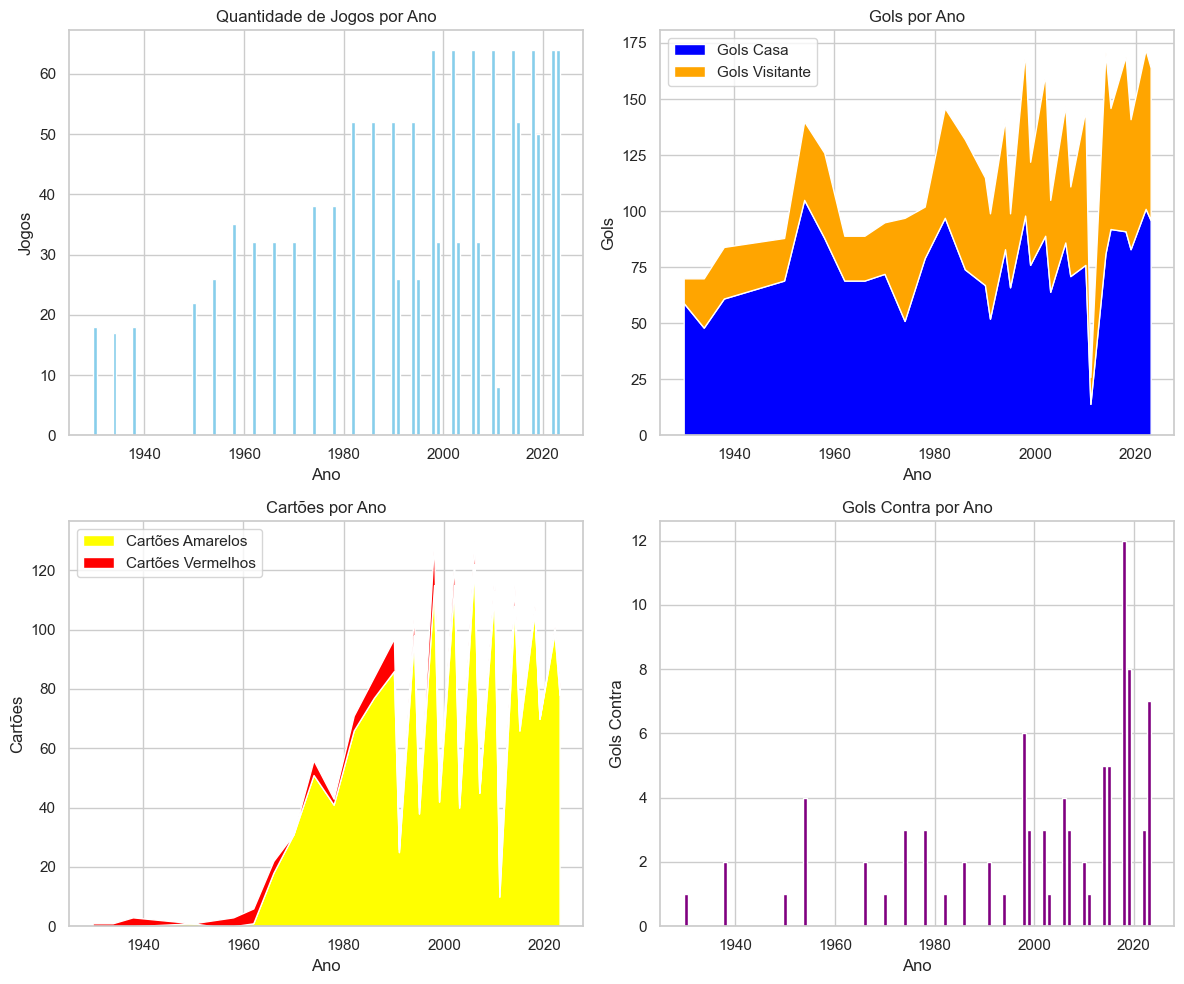

In [45]:
# Ajustar os nomes das colunas para cartões
wc.rename(columns={
    'home_yellow_card_long': 'cartao_amarelo_1',
    'away_yellow_card_long': 'cartao_amarelo_2',
    'home_red_card': 'cartao_vermelho_1',
    'away_red_card': 'cartao_vermelho_2'
}, inplace=True)

jogos_por_ano = wc.groupby('Year').size()
gols_por_ano = wc.groupby('Year')[['gols_1', 'gols_2']].sum()
cartoes_por_ano = wc.groupby('Year').agg({
    'cartao_amarelo_1': 'count',
    'cartao_amarelo_2': 'count',
    'cartao_vermelho_1': 'count',
    'cartao_vermelho_2': 'count'
})
cartoes_por_ano['amarelos'] = cartoes_por_ano['cartao_amarelo_1'] + cartoes_por_ano['cartao_amarelo_2']
cartoes_por_ano['vermelhos'] = cartoes_por_ano['cartao_vermelho_1'] + cartoes_por_ano['cartao_vermelho_2']


gols_contra_por_ano = wc.groupby('Year')[['home_own_goal', 'away_own_goal']].count().sum(axis=1)


import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Gráfico 1: Jogos por ano
axs[0, 0].bar(jogos_por_ano.index, jogos_por_ano.values, color='skyblue')
axs[0, 0].set_title('Quantidade de Jogos por Ano')
axs[0, 0].set_xlabel('Ano')
axs[0, 0].set_ylabel('Jogos')

# Gráfico 2: Gols por ano
axs[0, 1].stackplot(gols_por_ano.index, gols_por_ano['gols_1'], gols_por_ano['gols_2'], labels=['Gols Casa', 'Gols Visitante'], colors=['blue', 'orange'])
axs[0, 1].set_title('Gols por Ano')
axs[0, 1].set_xlabel('Ano')
axs[0, 1].set_ylabel('Gols')
axs[0, 1].legend(loc='upper left')

# Gráfico 3: Cartões por ano
axs[1, 0].stackplot(cartoes_por_ano.index, cartoes_por_ano['amarelos'], cartoes_por_ano['vermelhos'], labels=['Cartões Amarelos', 'Cartões Vermelhos'], colors=['yellow', 'red'])
axs[1, 0].set_title('Cartões por Ano')
axs[1, 0].set_xlabel('Ano')
axs[1, 0].set_ylabel('Cartões')
axs[1, 0].legend(loc='upper left')

# Gráfico 4: Gols contra por ano
axs[1, 1].bar(gols_contra_por_ano.index, gols_contra_por_ano.values, color='purple')
axs[1, 1].set_title('Gols Contra por Ano')
axs[1, 1].set_xlabel('Ano')
axs[1, 1].set_ylabel('Gols Contra')

plt.tight_layout()
plt.show()
